In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies." 

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**Q1:** Northeuralex is a lexicostatistical dataset for providing lexical data for more than 20 language families in a unified IPA(International Phonetics Alphabet) encoding, which is generated automatically from the ortographies or standard descriptions.


Let's read in the wordforms in this dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)


Mounted at /content/drive/


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**Q2:** 
**Language_ID** : Language id of the given word(ENG for english, fin for Finnish etc.)

**Concept_ID**: Lexical concept id of the given word. For example, the concept of the word "eye" is "anatomy".

**raw_ipa**: The word in written IPA(International Phonetics Alphabet). In other words, this column is the standard representation of speech sounds in written form.

**IPA**: Tokenized raw_ipa.

Now let's read in some metadata about the languages.

In [2]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `Family`, `iso_code`, and `subfamily` columns of the data.

**Q3: **
**Family**: Language family of the given language.

**Iso_code**: Language id.

**Subfamily**: Subfamily of the given language.

Now let's read in some further data about the concepts.



In [3]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**Q4: **

**id_nelex**: Concept_ID

**gloss_en**: English version of the given word.

**position_in_ranking**: Their ranking position.(i.e. 1 has the highest ranking, 2 is the second highest, etc.)

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [4]:
# Problem 1a: rename the approproate columns in the languages and concepts dataframes to make this merge possible.
#your code here
languages = languages.rename(columns={'glotto_code': 'Glottocode' , 'iso_code': 'Language_ID' })
concepts = concepts.rename(columns={'id_nelex': 'Concept_ID'})




wordforms1 = wordforms.merge(languages, how='inner' , on=['Glottocode' , 'Language_ID'] )
wordforms2 = wordforms1.merge(concepts, how='inner' , on='Concept_ID')
#wordforms = wordforms.merge(concepts, how='inner' , on='Concept_ID')
wordforms = wordforms2
#wordforms = wordforms.merge(concepts, how='inner', on='Concept_ID' )
# Problem 1b: Use the merge function to merge the three dataframes into one.
#your code here

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,Finnish,Uralic,Finnic,61.0000,24.4500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,krl,kare1335,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,North Karelian,Uralic,Finnic,65.1691,30.8655,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
2,olo,livv1243,Auge::N,silmy,silmʏ,s i l m ʏ,silmi,SILMY,SVRMV,validate,Olonets Karelian,Uralic,Finnic,61.0000,33.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
3,vep,veps1250,Auge::N,sil'm,silʲm,s i lʲ m,silm,SILM,SVRM,validate,Veps,Uralic,Finnic,60.3353,34.7865,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
4,ekk,esto1258,Auge::N,silm,sʲilm,sʲ i l m,silm,SILM,SVRM,validate,Estonian,Uralic,Finnic,59.2500,24.7500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,che,chec1245,ertragen::V,садетта,sədetːə,s ə d e t t ə,s3det3,SETETE,SVTVTV,review,Chechen,Nakh-Daghestanian,Nakh,43.5000,45.5000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121609,arb,stan1318,ertragen::V,أطاق,atˤaːqa,a tˤ a a q a,ataqa,ATAKA,VTVKV,validate,Standard Arabic,Afro-Asiatic,Semitic,27.9625,43.8525,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121610,arb,stan1318,ertragen::V,تحمل,taħamala,t a ħ a m a l a,taGamala,TAHAMALA,TVHVMVRV,validate,Standard Arabic,Afro-Asiatic,Semitic,27.9625,43.8525,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121611,heb,hebr1245,ertragen::V,סבל,saval,s a v a l,saval,SABAL,SVWVR,validate,Modern Hebrew,Afro-Asiatic,Semitic,31.1056,35.0179,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [5]:
!pip install lingpy

     |████████████████████████████████| 590 kB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 195 kB 71.2 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 561 kB 44.8 MB/s 


In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [12]:
#Problem 2a: Filter our the non-Indo-European languages from the wordforms and languages dataframes
#your code here
wordforms = wordforms[wordforms.family == 'Indo-European']
languages = languages[languages.family == 'Indo-European']

#Problem 2b: Filter our the concepts which appear less than or equal to rank 20 in the concepts dataframe.
max_rank=20
concepts_20 = concepts[concepts.position_in_ranking <= max_rank]
concepts_30 = concepts[concepts.position_in_ranking <= 30] #will be used for the next few questions.
display(concepts)
display(languages)
display(wordforms)
# your code here

,number,position_in_ranking,ranking_value,Concept_ID,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


,name,Glottocode,Language_ID,family,subfamily,latitude,longitude
26,Bengali,beng1280,ben,Indo-European,Indo-Aryan,24.000000,90.000000
27,Hindi,hind1269,hin,Indo-European,Indo-Aryan,27.200000,78.000000
28,Northern Pashto,nort2646,pbu,Indo-European,Iranian,32.100000,67.200000
29,Western Farsi,west2369,pes,Indo-European,Iranian,28.659300,55.158600
30,Northern Kurdish,nort2641,kmr,Indo-European,Iranian,37.000000,43.000000
31,Ossetian,osse1243,oss,Indo-European,Iranian,43.180000,44.230000
32,Armenian,nucl1235,hye,Indo-European,Armenic,40.000000,45.000000
33,Modern Greek,mode1248,ell,Indo-European,Graeco-Phrygian,38.000000,23.750000
34,Standard Albanian,alba1267,sqi,Indo-European,Albanian,41.330000,19.850000
35,Bulgarian,bulg1262,bul,Indo-European,Balto-Slavic,42.700000,23.800000


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
26,ben,beng1280,Auge::N,চক্ষু,t͡ʃɔkkʰu,t͡ʃ ɔ k kʰ u,Coku,CUKKY,KVKKV,validate,Bengali,Indo-European,Indo-Aryan,24.0000,90.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
27,hin,hind1269,Auge::N,आँख,ãːkʰ,ã ã kʰ,ak,AK,VK,validate,Hindi,Indo-European,Indo-Aryan,27.2000,78.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
28,hin,hind1269,Auge::N,चक्षु,t͡ʃəkʂʊ,t͡ʃ ə k ʂ ʊ,C3kSu,CEKSY,KVKSV,validate,Hindi,Indo-European,Indo-Aryan,27.2000,78.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
29,pbu,nort2646,Auge::N,سترګه,st̪ərɡa,s t ə r ɡ a,st3rga,STERKA,STVRKV,validate,Northern Pashto,Indo-European,Iranian,32.1000,67.2000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
30,pes,west2369,Auge::N,چشم,t͡ʃæʃm,t͡ʃ æ ʃ m,CESm,CESM,KVSM,validate,Western Farsi,Indo-European,Iranian,28.6593,55.1586,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121560,spa,stan1288,ertragen::V,soportar,sopoɾtaɾ,s o p o ɾ t a ɾ,soportar,SUPURTAR,SVPVRTVR,validate,Spanish,Indo-European,Italic,42.2500,-3.7000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121561,por,port1283,ertragen::V,suportar,supurˈtar,s u p u r t a r,supurtar,SYPYRTAR,SVPVRTVR,validate,Portuguese,Indo-European,Italic,39.9100,-8.1000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121562,ita,ital1282,ertragen::V,sopportare,sopːortare,s o p p o r t a r e,soportare,SUPURTARE,SVPVRTVRV,validate,Italian,Indo-European,Italic,43.0464,12.6489,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121563,ron,roma1327,ertragen::V,răbda,rəbda,r ə b d a,r3bda,REPTA,RVPTV,validate,Romanian,Indo-European,Italic,46.3913,24.2256,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we we will compute the normalized levenshtein distance between the words for Auge::N (eye in English) for German and English and then similarily for all 19 other concepts. We will then average these values to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [7]:
import lingpy as lp
import numpy as np

#initialize confusion matrix
confusion= [[0 for j in range(len(languages))] for i in range(len(languages))]



#Problem 3: fill the confusion matrix  using the 
#lp.align.pairwise.edit_dist function from lingpy, on 
#the "IPA" fields for each language.


for c1, language1 in enumerate(languages['name']):
  for c2,language2 in enumerate(languages['name']):
     
    distances=[]
    for concept in concepts_20["Concept_ID"]:
      d1 = wordforms[(wordforms['Concept_ID'] == concept) & (wordforms['name'] == language1)]
      d2 = wordforms[(wordforms['Concept_ID'] == concept) & (wordforms['name'] == language2)]
      i1 = str(d1['IPA'])
      i2 = str(d2['IPA'])
      distance = lp.align.pairwise.edit_dist(i1 , i2 , normalized=True)
      distances.append(distance)
      
    distances = np.array(distances)
    av = np.mean(distances)
    
    confusion[c1][c2]= av
    

confusion    

2021-11-30 21:12:36,144 [INFO] Compiling diacritics and vowels...
2021-11-30 21:12:36,151 [INFO] Diacritics and sound classes were successfully compiled.
2021-11-30 21:12:36,154 [INFO] Compiling model <asjp>...
2021-11-30 21:12:36,159 [INFO] ('ǃ', '!')
2021-11-30 21:12:36,161 [INFO] ('ǂ', '!')
2021-11-30 21:12:36,163 [INFO] ('ǁ', '!')
2021-11-30 21:12:36,164 [INFO] ('ǀ', '!')
2021-11-30 21:12:36,167 [INFO] ('ʘ', '!')
2021-11-30 21:12:36,174 [INFO] ('gǃ', '!')
2021-11-30 21:12:36,175 [INFO] ('gǂ', '!')
2021-11-30 21:12:36,179 [INFO] ('gǁ', '!')
2021-11-30 21:12:36,183 [INFO] ('gǀ', '!')
2021-11-30 21:12:36,187 [INFO] ('gʘ', '!')
2021-11-30 21:12:36,191 [INFO] ('ǃŋ', '!')
2021-11-30 21:12:36,195 [INFO] ('ǂŋ', '!')
2021-11-30 21:12:36,196 [INFO] ('ǁŋ', '!')
2021-11-30 21:12:36,210 [INFO] ('ǀŋ', '!')
2021-11-30 21:12:36,212 [INFO] ('ʘŋ', '!')
2021-11-30 21:12:36,214 [INFO] ('!', '!')
2021-11-30 21:12:36,216 [INFO] ('|', '!')
2021-11-30 21:12:36,217 [INFO] ('g!', '!')
2021-11-30 21:12:36,22

[[0.0,
  0.21425775979734513,
  0.19132243932866405,
  0.1630851013996059,
  0.19617335418471316,
  0.15717472363366836,
  0.19131174229018813,
  0.20754841026852344,
  0.20294042028172235,
  0.1993854472481604,
  0.18907577234529577,
  0.18498418479342793,
  0.1733081783188136,
  0.17798118957898745,
  0.194838641995996,
  0.17620372223109035,
  0.18824412623375292,
  0.17850625340084497,
  0.20189949449683256,
  0.20213519140134406,
  0.18987063159000198,
  0.17918293075907937,
  0.22139221221679523,
  0.17518949901394598,
  0.1826592374219011,
  0.19474302875328436,
  0.17536382867778216,
  0.27660332441349156,
  0.22084106274616522,
  0.20324013339860506,
  0.199024835349783,
  0.26007036950262624,
  0.16578129091310584,
  0.1821882042134306,
  0.18340759039378052,
  0.23839683694375932,
  0.2009596102261189],
 [0.21425775979734513,
  0.0,
  0.2578668325676053,
  0.23096029648362237,
  0.22415643901739796,
  0.2302397431738384,
  0.2623725001854427,
  0.25651150142978485,
  0.24102

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages. 


In [8]:
language_names=list(languages["name"].values)
lp.flat_cluster('upgma', 0.15, confusion, language_names)


{0: ['Bengali'],
 1: ['Hindi'],
 2: ['Northern Pashto'],
 3: ['Western Farsi'],
 4: ['Northern Kurdish'],
 5: ['Ossetian'],
 6: ['Armenian'],
 7: ['Modern Greek'],
 8: ['Standard Albanian'],
 9: ['Bulgarian',
  'Croatian',
  'Slovene',
  'Slovak',
  'Czech',
  'Polish',
  'Ukrainian',
  'Belarusian',
  'Russian'],
 18: ['Lithuanian', 'Latvian'],
 20: ['Icelandic'],
 21: ['Norwegian (Bokmål)', 'Danish', 'German', 'Swedish'],
 25: ['Dutch', 'English'],
 27: ['Irish'],
 28: ['Welsh'],
 29: ['Breton'],
 30: ['Latin'],
 31: ['French'],
 32: ['Catalan', 'Spanish', 'Portuguese'],
 35: ['Italian'],
 36: ['Romanian']}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy erros in this clustering?

**Q5: **
- Balto-Slavic Languages: Bulgarian, Crotian etc.
- Germanic Languages: Norwegian, Danish, German Sweedish 
- Latin languages: Catalan, Spanish, Portuguese

Italina, French should also be in Latin cluster, but they're not.

English and Dutch should also be in Germanic languages, but they're not.(they form another cluster)



Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


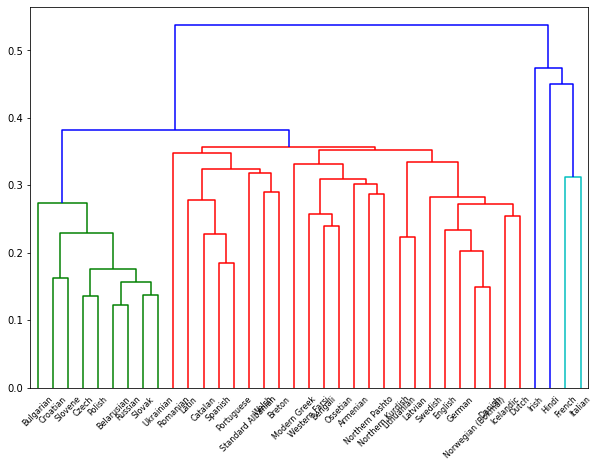

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

#Problem 4: use the linkage function with the average linkage method to compute the clustering.
linked = linkage(confusion, 'average')


#plot the results using dendrogram
def llf(id): return list(languages["name"].values)[id]
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

***Question 6:*** 

**Q6**: Balto-Slavic Languages(the green family at the left)
-Italic Languages(Catalan-Spanish)
Irish and Hindi are in the same cluster at the leaf level but they belong to different subfamilies(Irish - Celtic , Hindi - Iranian)

***Question 7:*** Try three of the other linkage methods and describe how the change the results.

**Q7**:
With weigthed linkage function, the clusters change. For example, now Irish not in the same subfamily with Hindi. Also, there are more subfamilies within Balto-Slavic languages. In other words, there are more clusters.


***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**Q8:** With max_rank = 30, we have a slight difference in clusters. For example, the Balto-Slavic languages have more subfamilies. Moreover, Irish and Hindi are not sisters of each other(i.e. their parent node are not the same). But in general, the dendograms are alike.

For Questions 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


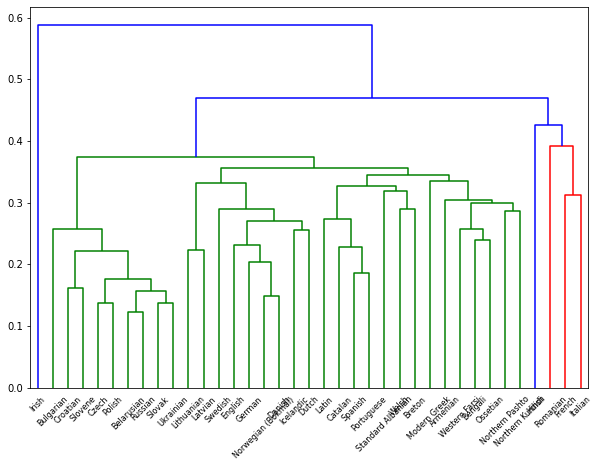

In [10]:

linked = linkage(confusion, 'weighted')


plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()



For Question 8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


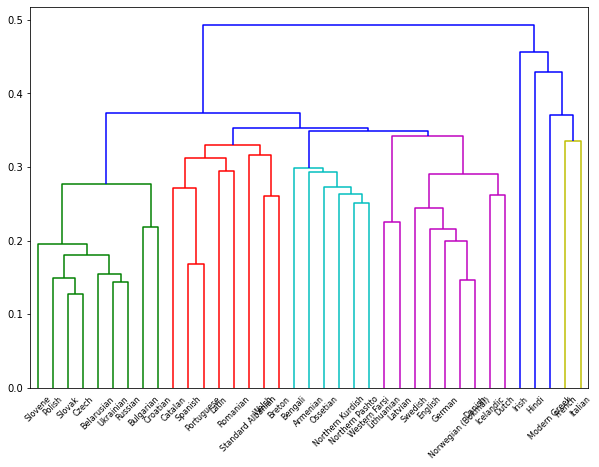

In [13]:
confusion= [[0 for j in range(len(languages))] for i in range(len(languages))]



#Problem 3: fill the confusion matrix  using the 
#lp.align.pairwise.edit_dist function from lingpy, on 
#the "IPA" fields for each language.


for c1, language1 in enumerate(languages['name']):
  for c2,language2 in enumerate(languages['name']):
     
    distances=[]
    for concept in concepts_30["Concept_ID"]:
      d1 = wordforms[(wordforms['Concept_ID'] == concept) & (wordforms['name'] == language1)]
      d2 = wordforms[(wordforms['Concept_ID'] == concept) & (wordforms['name'] == language2)]
      i1 = str(d1['IPA'])
      i2 = str(d2['IPA'])
      distance = lp.align.pairwise.edit_dist(i1 , i2 , normalized=True)
      distances.append(distance)
      
    distances = np.array(distances)
    av = np.mean(distances)
    
    confusion[c1][c2]= av

linked = linkage(confusion, 'average')


plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

